<a href="https://colab.research.google.com/github/priya456-hash/Stock_Market_Prediction.ipynb/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats

#from pandas.core import datetools
from plotly import tools
!pip install chart-studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ae9932eeaae0b5fcdc0e6aaf50fa7474904f8c92e177ea1c95c4567961929fad
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [55]:
df = pd.read_csv("/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [56]:
# Brief Description of our dataset
df.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


In [57]:
# Replace the column name from name to ticks
df = df.rename(columns={'Stock Trading': 'Ticks'})
df

,Date,Open,High,Low,Close,Volume,Ticks
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [62]:
# Let's analyze some of the stocks.
high_trading_stocks = df.loc[df['Ticks'] >= 25628028000]
high_trading_stocks.head()

,Date,Open,High,Low,Close,Volume,Ticks
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
10,2016-12-15,43440,43880,42550,43000,627400,27055034000
13,2016-12-12,43950,44000,42880,43130,775300,33633233000
14,2016-12-09,41700,42970,41150,42590,1975600,83251556000


In [63]:
high_trading_stocks.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    424 non-null    object
 1   Open    424 non-null    int64 
 2   High    424 non-null    int64 
 3   Low     424 non-null    int64 
 4   Close   424 non-null    int64 
 5   Volume  424 non-null    int64 
 6   Ticks   424 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 26.5+ KB


In [64]:
high_trading_stocks.head()

,Date,Open,High,Low,Close,Volume,Ticks
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
10,2016-12-15,43440,43880,42550,43000,627400,27055034000
13,2016-12-12,43950,44000,42880,43130,775300,33633233000
14,2016-12-09,41700,42970,41150,42590,1975600,83251556000


In [65]:
# Create a copy to avoid the SettingWarning .loc issue 
high_trading_stocks_df = high_trading_stocks.copy()
# Change to datetime datatype.

high_trading_stocks_df.loc[:, 'Date'] = pd.to_datetime(amzn.loc[:,'Date'], format="%Y/%m/%d")
high_trading_stocks_df

,Date,Open,High,Low,Close,Volume,Ticks
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
10,2016-12-15,43440,43880,42550,43000,627400,27055034000
13,2016-12-12,43950,44000,42880,43130,775300,33633233000
14,2016-12-09,41700,42970,41150,42590,1975600,83251556000
...,...,...,...,...,...,...,...
1121,2012-06-05,17000,17010,16050,16060,1815700,29842212000
1155,2012-04-13,18270,19020,18240,18970,3616500,67067655000
1161,2012-04-05,17680,17980,17380,17440,1587000,28010559000
1162,2012-04-04,18600,18630,17800,17800,1914900,34706476000


In [66]:
high_trading_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    424 non-null    object
 1   Open    424 non-null    int64 
 2   High    424 non-null    int64 
 3   Low     424 non-null    int64 
 4   Close   424 non-null    int64 
 5   Volume  424 non-null    int64 
 6   Ticks   424 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 26.5+ KB


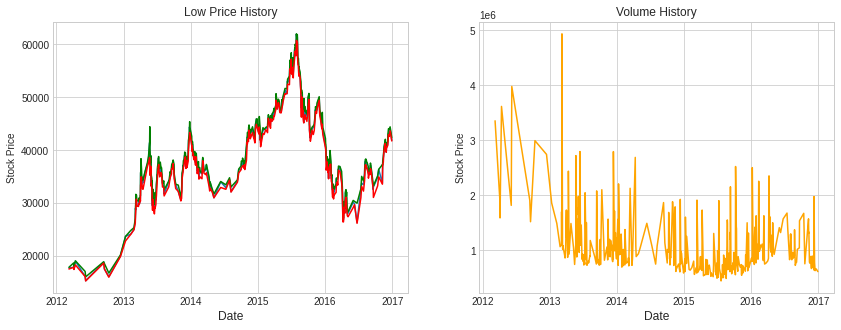

In [67]:
# Simple plotting where trading stocks are greater than 25628028000
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(high_trading_stocks_df["Date"], high_trading_stocks_df["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close Price History")

# Second Subplot
ax1.plot(high_trading_stocks_df["Date"], high_trading_stocks_df["High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("High Price History")

# Third Subplot
ax1.plot(high_trading_stocks_df["Date"], high_trading_stocks_df["Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

# Fourth Subplot
ax2.plot(high_trading_stocks_df["Date"], high_trading_stocks_df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Volume History")
plt.show()

Use of prophet

In [68]:
m = Prophet()

# Drop the columns
ph_df = high_trading_stocks_df.drop(['Open', 'High', 'Low','Volume', 'Ticks'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2016-12-30,41830
6,2016-12-21,44000
10,2016-12-15,43000
13,2016-12-12,43130
14,2016-12-09,42590


In [69]:
m = Prophet()

m.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
784,2017-12-26,35394.978806,25939.944340,45033.511614
785,2017-12-27,35539.123086,25248.503086,45670.870909
786,2017-12-28,35661.890848,25945.226204,44830.781208
787,2017-12-29,34586.643841,24770.013961,44628.133602
788,2017-12-30,35140.678163,25774.367523,45118.183323


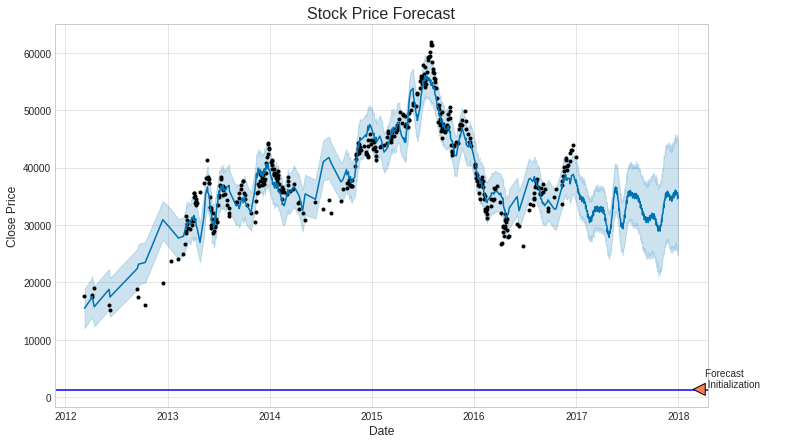

In [71]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)


fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


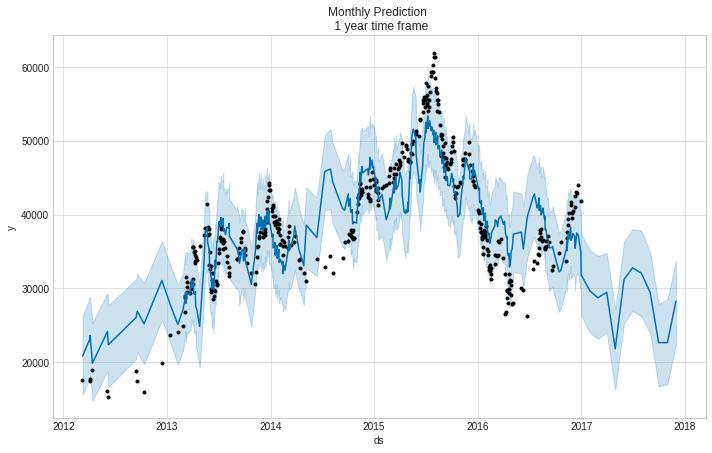

In [72]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

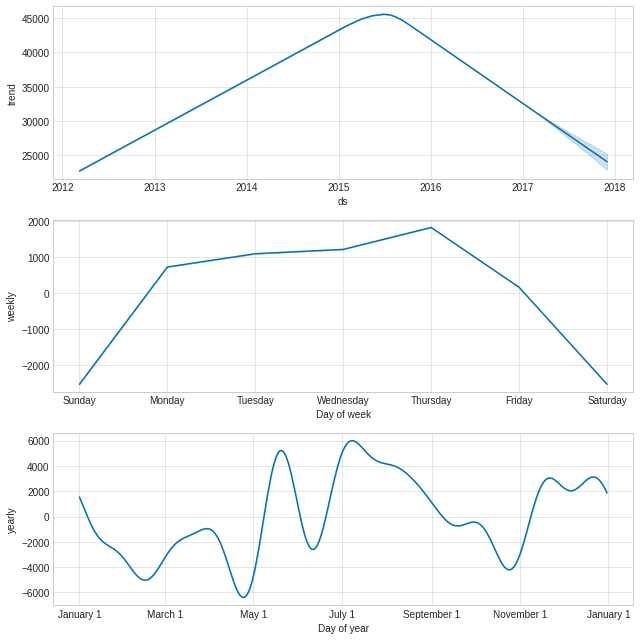

In [73]:
fig = m.plot_components(fcst)
plt.show()